## Main Goal
In this project, we aim to examine the performance of various machine learning models for predicting sales of video games based on their attributes!  

### Data Understanding
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz.com].
1. **Rank** - Ranking of overall sales
2. **Name** - The games name
3. **Platform** - Platform of the games release (i.e. PC,PS4, etc.)
4. **Year** - Year of the game's release
5. **Genre** - Genre of the game
6. **Publisher** - Publisher of the game
7. **NA_Sales** - Sales in North America (in millions)
8. **EU_Sales** - Sales in Europe (in millions)
9. **JP_Sales** - Sales in Japan (in millions)
10. **Other_Sales** - Sales in the rest of the world (in millions)
11. **Global_Sales** - Total worldwide sales.

Dataset is downloaded from: [https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("datasets/vgsales.csv")

In [4]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
dataset.shape

(16598, 11)

In [6]:
dataset.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Dealing With Null values
We assume that there are no underlying patterns in 'Year' and 'Publisher' missing values, and the missing values happened randomly!  
So therefore we remove the rows that have missing values!

In [7]:
# Drop rows with missing values in 'year' and 'publisher'
cleaned_dataset = dataset.dropna(subset=['Year', 'Publisher'])

In [8]:
cleaned_dataset.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Exploratory Data Analysis
#### What is the overall distribution of Global_Sales and do any outliers stand out in this distribution?

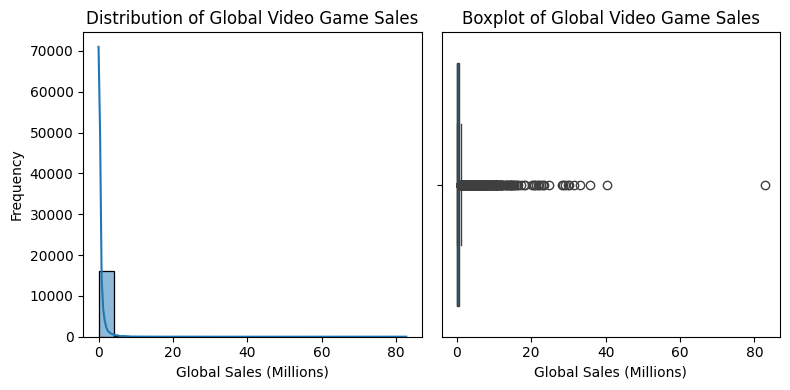

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(data=cleaned_dataset, x='Global_Sales', bins=20, kde=True, ax=axes[0])
axes[0].set_xlabel('Global Sales (Millions)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Global Video Game Sales')

# Boxplot on the right
sns.boxplot(x=cleaned_dataset['Global_Sales'], ax=axes[1])
axes[1].set_xlabel('Global Sales (Millions)')
axes[1].set_title('Boxplot of Global Video Game Sales')

# Adjust layout and display
plt.tight_layout()
plt.show()

> Most of the games have 'Global_Sales' around 1-5 millions copies! There are also many single games that have sold more than the "average range" therefore the plots show lots of outliers!

#### How have average and median Global_Sales evolved by release year?

In [10]:
df_grouped = cleaned_dataset.groupby('Year')['Global_Sales'].agg(['mean', 'median']).reset_index()

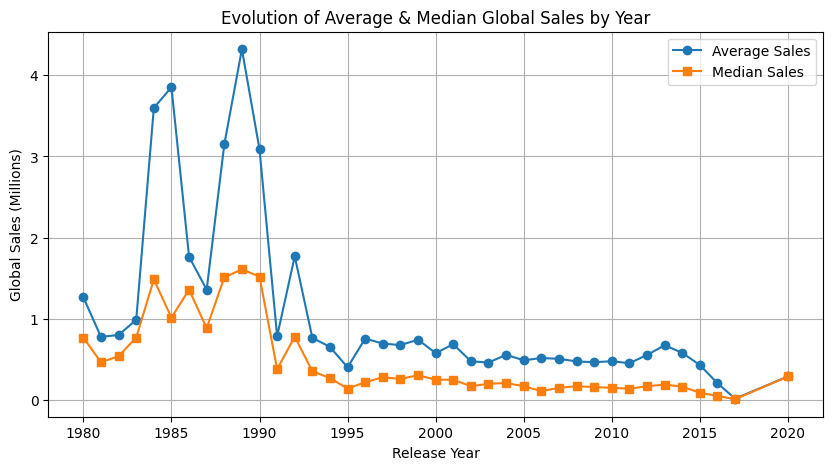

In [11]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['Year'], df_grouped['mean'], label='Average Sales', marker='o')
plt.plot(df_grouped['Year'], df_grouped['median'], label='Median Sales', marker='s')

plt.xlabel('Release Year')
plt.ylabel('Global Sales (Millions)')
plt.title('Evolution of Average & Median Global Sales by Year')
plt.legend()
plt.grid()
plt.show()

> The large fluctuations in **average sales** suggest that a few blockbuster games significantly impacted the market between 1984 and 1990. Meanwhile, the smaller fluctuations in **median sales** indicate that most games had relatively stable sales, with only a few outliers driving major spikes in the average. This pattern suggests that while a handful of big hits dominated sales early on, the overall market became more consistent over time!

#### Which platforms (PC, PS4, etc.) tend to have the highest and lowest Global_Sales distributions?

In [12]:
platform_sales = cleaned_dataset.groupby('Platform')['Global_Sales'].mean().reset_index()

In [13]:
top_5_platforms = platform_sales.nlargest(5, 'Global_Sales')
bottom_5_platforms = platform_sales.nsmallest(5, 'Global_Sales')

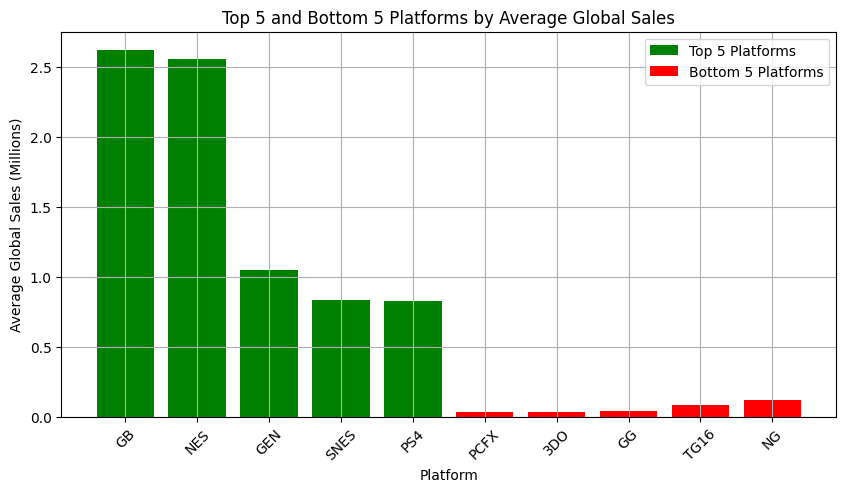

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(top_5_platforms['Platform'], top_5_platforms['Global_Sales'], color='green', label='Top 5 Platforms')
plt.bar(bottom_5_platforms['Platform'], bottom_5_platforms['Global_Sales'], color='red', label='Bottom 5 Platforms')

plt.xlabel('Platform')
plt.ylabel('Average Global Sales (Millions)')
plt.title('Top 5 and Bottom 5 Platforms by Average Global Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

> The GameBoy, NES and GEN, followed by GEN, SNES and PS4 are the top 5 platforms in average global sales (millions)!  
The PCFX, 3DO and GG, followed by TG16 and NG are the bottom 5 platforms in average global sales (millions)!  

#### How do different genres (Action, Sports, RPG, etc.) compare in terms of average and variance of Global_Sales?

In [15]:
genre_sales = cleaned_dataset.groupby('Genre')['Global_Sales'].agg(['mean', 'var']).reset_index()

In [16]:
# Sort by mean sales and select top 5 genres
top_5_genres = genre_sales.sort_values(by='mean', ascending=False).head(5)

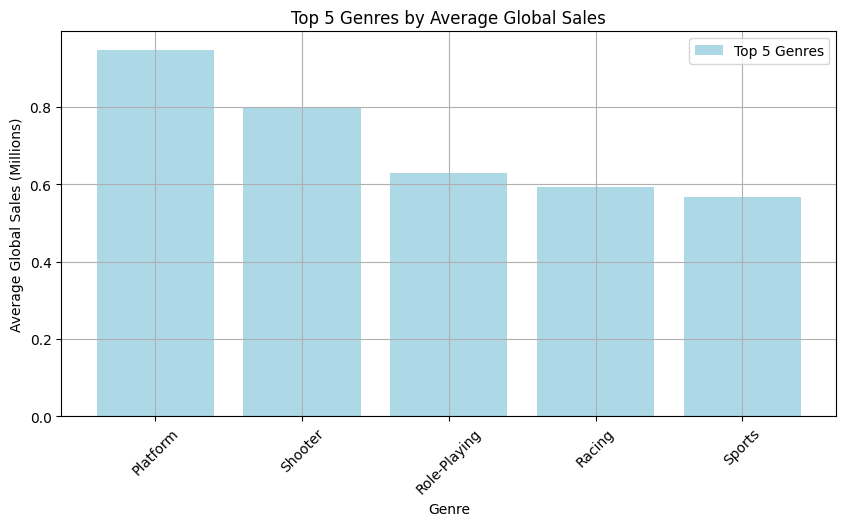

In [17]:
plt.figure(figsize=(10, 5))
plt.bar(top_5_genres['Genre'], top_5_genres['mean'], color='lightblue', label='Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (Millions)')
plt.title('Top 5 Genres by Average Global Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

> Platformer, Shooter, Role-Playing, Racing and Sports games are the top 5 genres of games with highest average global sales!  

#### Which publishers consistently produce top‐selling games, and how does their portfolio’s sales distribution look?

In [18]:
publishers_sales = cleaned_dataset.groupby('Publisher')['Global_Sales'].mean().reset_index()

In [19]:
# Sort and get top 5 publishers
top_5_publishers = publishers_sales.sort_values(by='Global_Sales', ascending=False).head(5)

In [20]:
# Filter dataset for only top publishers
df_top_publishers = cleaned_dataset[cleaned_dataset['Publisher'].isin(top_5_publishers['Publisher'])]

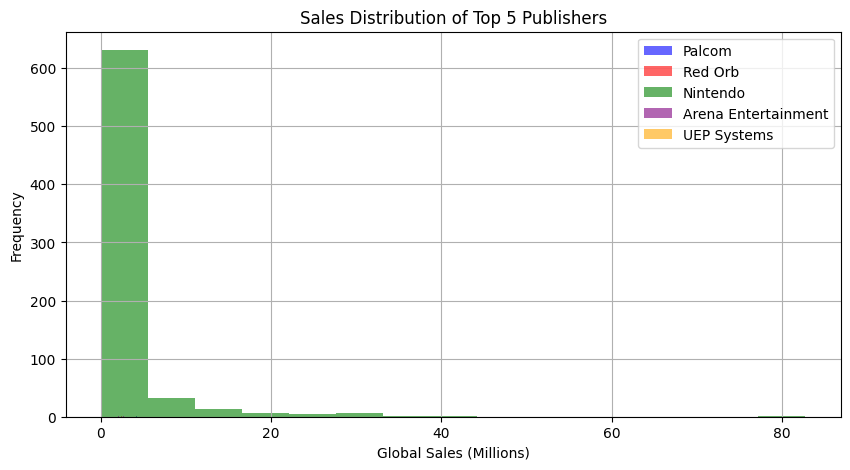

In [21]:
# Plot Sales Distribution
plt.figure(figsize=(10, 5))
colors = ['blue', 'red', 'green', 'purple', 'orange']  # Different colors for each publisher

for i, publisher in enumerate(top_5_publishers['Publisher']):
    subset = df_top_publishers[df_top_publishers['Publisher'] == publisher]
    plt.hist(subset['Global_Sales'], bins=15, alpha=0.6, label=publisher, color=colors[i])

plt.xlabel('Global Sales (Millions)')
plt.ylabel('Frequency')
plt.title('Sales Distribution of Top 5 Publishers')
plt.legend()
plt.grid()
plt.show()

> It seems that the Nintendo platform is the only publisher that constantly performed best!  

#### How strongly do regional sales (NA_Sales, EU_Sales, JP_Sales, Other_Sales) correlate with Global_Sales and with each other?

In [22]:
# Compute correlation matrix
sales_corr = cleaned_dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

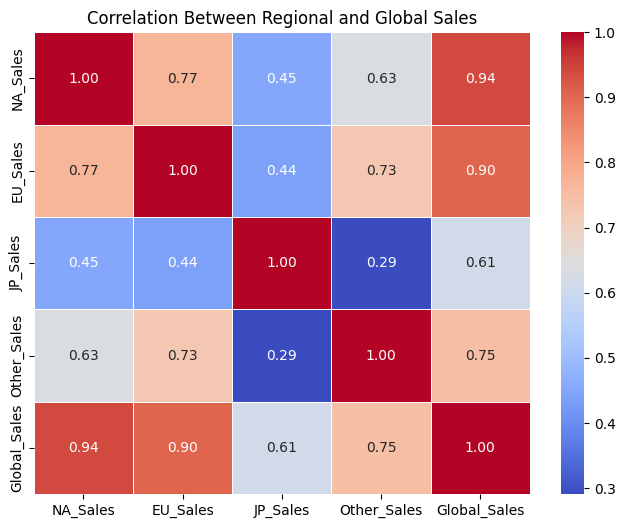

In [23]:
# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(sales_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Between Regional and Global Sales')
plt.show()

> 'NA_Sales' and 'EU_Sales' have very strong positive correlations of (0.94) and (0.90) respectively with 'Global_Sales'!  
'JP_Sales' has positive correlation of (0.61) with 'Global_Sales'!  
'Other_Sales' has also a positive correlation (0.75) with 'Global_Sales'!

#### For each game, what percentage of its Global_Sales comes from each region, and which regions dominate on average?

In [24]:
cleaned_dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [25]:
# Avoid division by zero errors
positive_global_sales = cleaned_dataset[cleaned_dataset['Global_Sales'] > 0]

In [26]:
# Calculate percentage contributions
positive_global_sales['NA_Percent'] = (positive_global_sales['NA_Sales'] / positive_global_sales['Global_Sales']) * 100
positive_global_sales['EU_Percent'] = (positive_global_sales['EU_Sales'] / positive_global_sales['Global_Sales']) * 100
positive_global_sales['JP_Percent'] = (positive_global_sales['JP_Sales'] / positive_global_sales['Global_Sales']) * 100
positive_global_sales['Other_Percent'] = (positive_global_sales['Other_Sales'] / positive_global_sales['Global_Sales']) * 100

In [27]:
# Display a sample
positive_global_sales[['Name', 'NA_Percent', 'EU_Percent', 'JP_Percent', 'Other_Percent']].head()

,Name,NA_Percent,EU_Percent,JP_Percent,Other_Percent
0,Wii Sports,50.145033,35.073725,4.556442,10.224801
1,Super Mario Bros.,72.266402,8.896620,16.923459,1.913519
2,Mario Kart Wii,44.249023,35.957566,10.580681,9.240648
3,Wii Sports Resort,47.727273,33.363636,9.939394,8.969697
4,Pokemon Red/Pokemon Blue,35.926044,28.339178,32.578897,3.187759


In [28]:
region_avg_sales = cleaned_dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

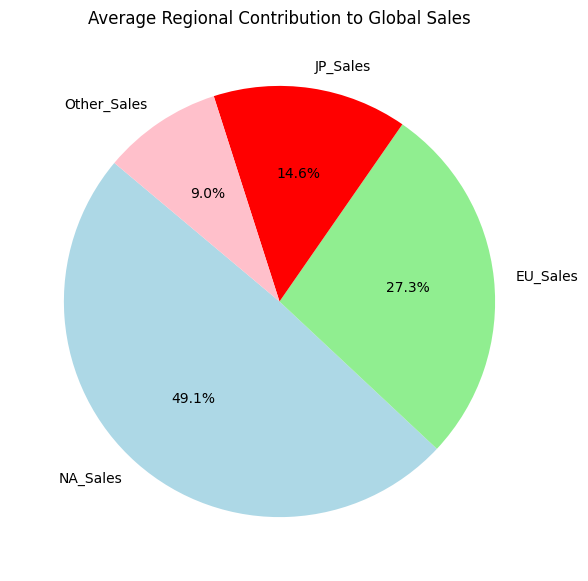

In [29]:
# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(region_avg_sales, labels=region_avg_sales.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'red', 'pink'], startangle=140)

plt.title("Average Regional Contribution to Global Sales")
plt.show()

> NA and EU regions dominate on average sales with 49.1% and 27.3% respectively!

#### Are there platforms whose sales peaked in particular years, indicating platform lifecycle effects?

In [30]:
platform_year_sales = cleaned_dataset.groupby(['Platform', 'Year'])['Global_Sales'].mean().reset_index()

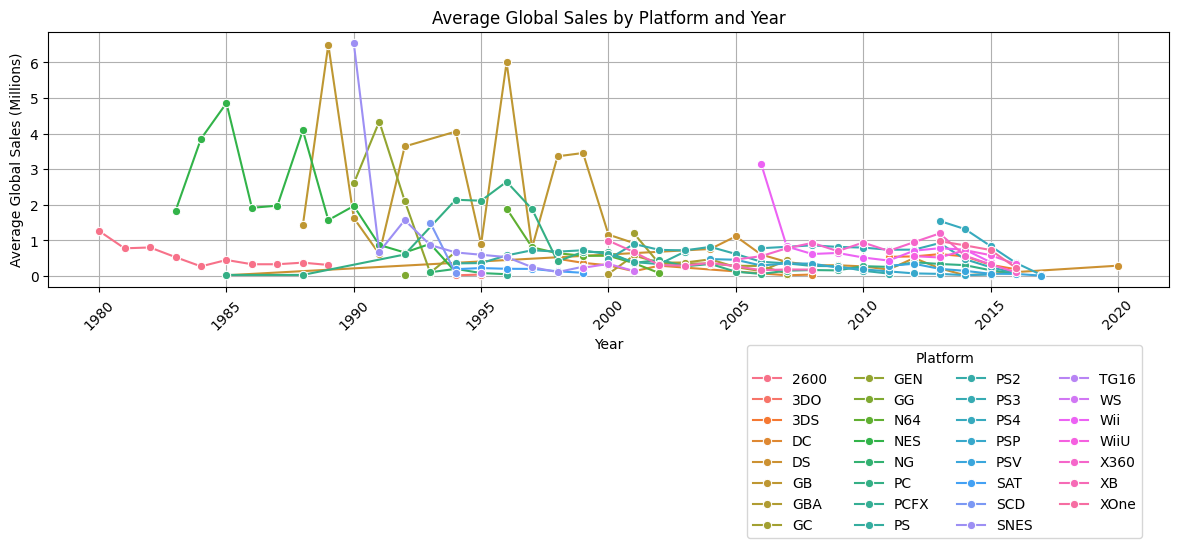

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=platform_year_sales, x='Year', y='Global_Sales', hue='Platform', marker='o')
plt.title('Average Global Sales by Platform and Year')
plt.xlabel('Year')
plt.ylabel('Average Global Sales (Millions)')
plt.legend(title="Platform", bbox_to_anchor=(0.8, -0.2), loc='upper center', ncol=4)
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. **Early market dominance**: NES and SNES had strong sales peaks in their prime years but declined sharply as newer consoles emerged.
2. **GameBoy sustained success**: Unlike NES and SNES, GameBoy maintained a long period of high sales, indicating strong handheld gaming appeal.
3. **Shift in industry dynamics (post-2000)**: From the 2000s onwards, most platforms show stable yet lower average sales (~0-1 million copies), suggesting market saturation and diversified gaming options.
4. **Wii’s sudden rise and fall**: Wii launched with impressive sales (~3M in 2006) but quickly dropped, showing an intense but short-lived demand.

#### Do certain genres perform better on specific platforms (e.g., Sports on Xbox vs. PlayStation)?

In [37]:
genre_platform_sales = cleaned_dataset.groupby(['Genre', 'Platform'])['Global_Sales'].mean().reset_index()

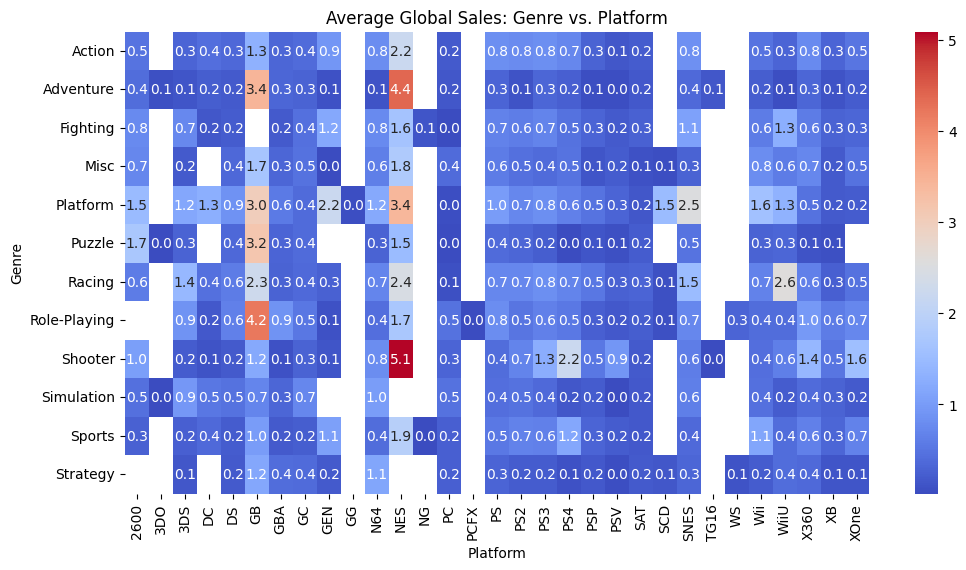

In [38]:
# Pivot the data for visualization
sales_heatmap = genre_platform_sales.pivot(index='Genre', columns='Platform', values='Global_Sales')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_heatmap, cmap='coolwarm', annot=True, fmt=".1f")

plt.xlabel("Platform")
plt.ylabel("Genre")
plt.title("Average Global Sales: Genre vs. Platform")
plt.show()


1. **GameBoy's dominance in multiple genres**: The GameBoy’s success in Adventure, Platform, Puzzle, and Role-Playing suggests handheld gaming was highly favored for story-driven and strategic experiences—perfect for gaming on the go.
2. **NES shaping the early console market**: NES leading Shooter, Platformer, and Adventure genres reflects the system’s role in popularizing action-packed and exploration-based titles that became staples of console gaming.
3. **Shift in platform diversity**: Over time, no single platform seems to dominate across many genres, suggesting a more diversified gaming landscape where each platform caters to specific player bases.

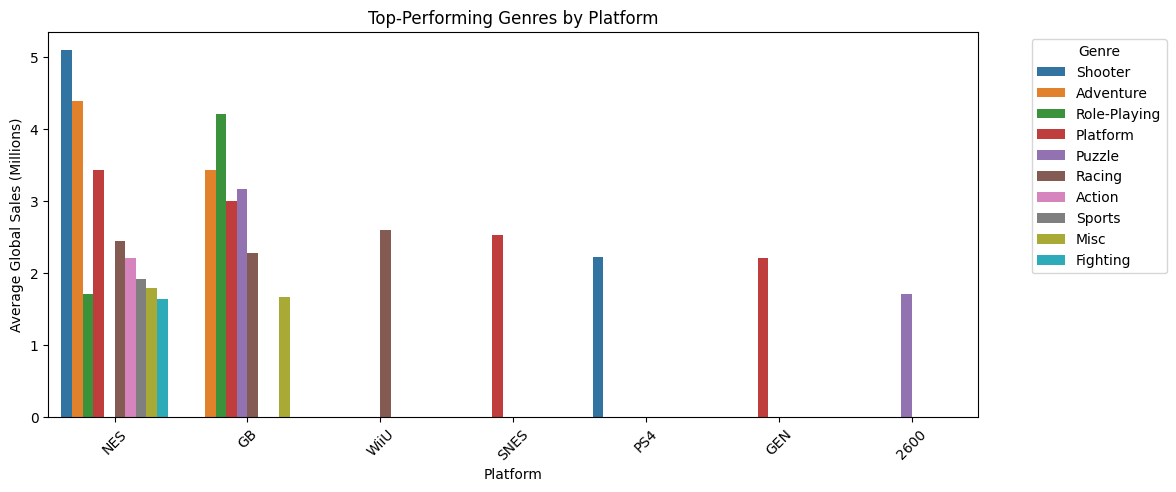

In [41]:
# Sort by sales and select top performers
top_genre_platform = genre_platform_sales.sort_values(by='Global_Sales', ascending=False).head(20)

plt.figure(figsize=(12, 5))
sns.barplot(data=top_genre_platform, x='Platform', y='Global_Sales', hue='Genre')

plt.xlabel("Platform")
plt.ylabel("Average Global Sales (Millions)")
plt.title("Top-Performing Genres by Platform")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

#### Which games are extreme outliers in Global_Sales, and what attributes (genre, platform, year, publisher) do they share?

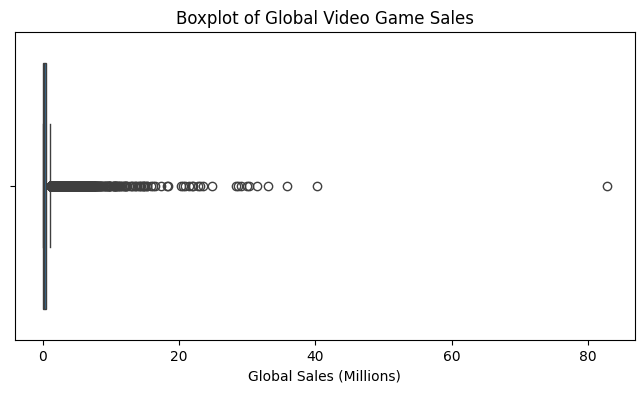

In [43]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=cleaned_dataset['Global_Sales'])
plt.xlabel('Global Sales (Millions)')
plt.title('Boxplot of Global Video Game Sales')
plt.show()

In [44]:
# Calculate Q1, Q3, and IQR
Q1 = cleaned_dataset['Global_Sales'].quantile(0.25)
Q3 = cleaned_dataset['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold (values above Q3 + 1.5*IQR are extreme outliers)
upper_bound = Q3 + 1.5 * IQR

# Extract extreme outlier games
outlier_games = cleaned_dataset[cleaned_dataset['Global_Sales'] > upper_bound]

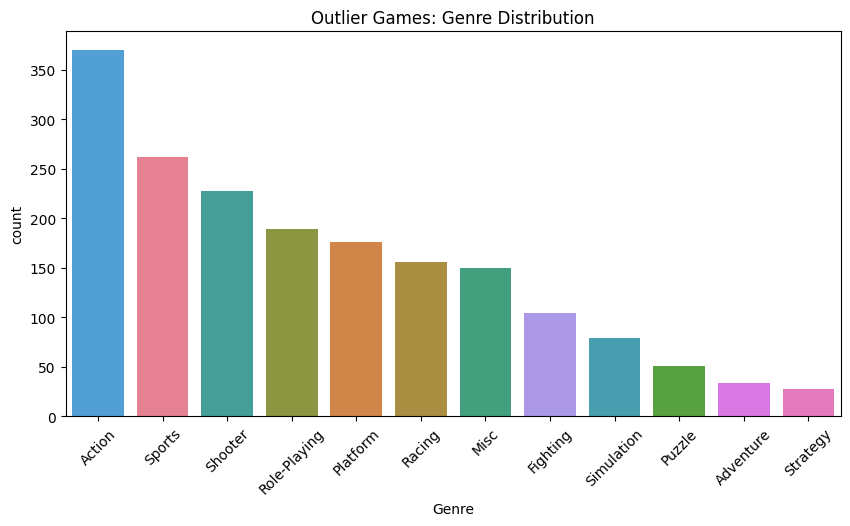

In [51]:
# Countplot for Genre distribution among outliers
plt.figure(figsize=(10, 5))
sns.countplot(data=outlier_games, x='Genre', order=outlier_games['Genre'].value_counts().index, hue='Genre')
plt.xticks(rotation=45)
plt.title("Outlier Games: Genre Distribution")
plt.show()

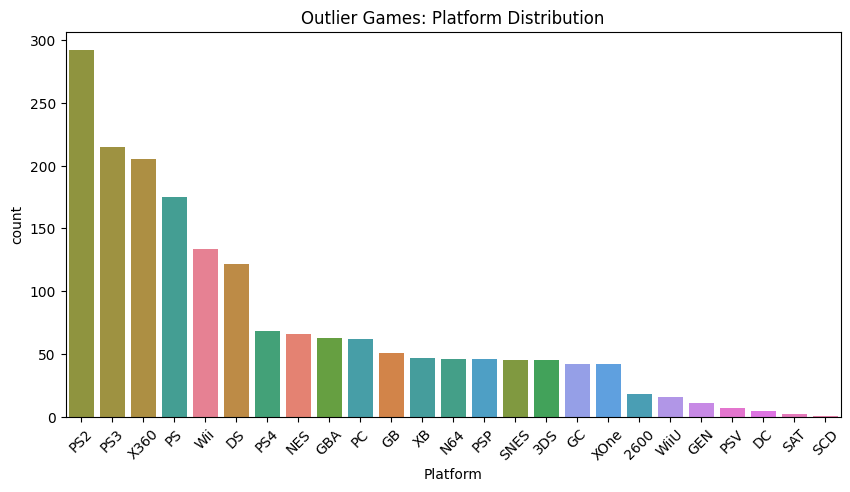

In [52]:
# Countplot for Platform distribution among outliers
plt.figure(figsize=(10, 5))
sns.countplot(data=outlier_games, x='Platform', order=outlier_games['Platform'].value_counts().index, hue='Platform')
plt.xticks(rotation=45)
plt.title("Outlier Games: Platform Distribution")
plt.show()

> This observation suggests that high-selling games tend to be in action-packed and competitive genres like Action, Sports, Shooter, and Role-Playing, which attract larger audiences. Meanwhile, niche genres like Puzzle, Adventure, and Strategy generally have lower mass-market appeal.  
> For platforms, PS2, PS3, X360, and PS dominate in outlier sales, indicating their widespread popularity, strong game libraries, and longevity in the market. On the other end, DC, SAT, and SCD had limited success, likely due to short lifespans, weaker market presence, or fewer blockbuster titles.

### Building Predicting Models

#### XGBoost Model
1. **Handles Outliers & Skewed Distribution** – The target feature has many outliers and is right-skewed. XGBoost's robust boosting technique can minimize the impact of extreme values.
2. **Captures Nonlinear Relationships** – With strong interactions between sales regions, publisher influence, and platform dynamics, XGBoost efficiently models complex dependencies.
3. **Works Well with Correlated Features** – NA_Sales and EU_Sales show very high correlation (0.94 & 0.90) with Global_Sales. XGBoost’s feature selection prevents redundant influence.
4. **Balances Market Trends** – Your data reveals shifts in industry patterns across decades and platforms. XGBoost can capture these evolving trends dynamically.
5. **Handles Missing or Noisy Data** – If there are inconsistencies or missing values in categorical attributes (e.g., publisher, platform), XGBoost mitigates their effect better than standard models.

In [86]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
cleaned_dataset.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [66]:
X = cleaned_dataset[['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = cleaned_dataset['Global_Sales']

In [67]:
# Encode categorical features
categorical_features = ['Platform', 'Genre', 'Publisher']
label_encoders = {}

In [68]:
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    X.loc[:, col] = label_encoders[col].fit_transform(X[col])

In [72]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Define base model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.3],  # Step size for weight updates
    'max_depth': [3, 6, 9],  # Depth of trees
    'subsample': [0.7, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.7, 1.0]  # Feature sampling per tree
}

In [78]:
# Grid search with cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.7}


In [80]:
# Get best parameters
best_params = grid_search.best_params_

In [ ]:
# Train XGBoost Model with Best Parameters
best_xgb = xgb.XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
best_xgb.fit(X_train, y_train)

#### Evaluating the model

In [84]:
# 5. Evaluate the Model
y_pred = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [85]:
print(f"RMSE of XGBoost Model: {rmse:.4f}")

RMSE of XGBoost Model: 0.9198


> The Root Mean Squared Error (RMSE) of 0.9198 indicates the average difference between your model’s predictions and the actual Global_Sales values!  
> Since sales data is in millions, an RMSE of 0.9198 means that, on average, the model’s predictions deviate from actual values by ~0.92 million units!  
> Since most sales values fall between 1-5 million, an RMSE of 0.9198M suggests the model performs reasonably well but still has room for improvement!  

In [87]:
# Calculate R² score
r2 = r2_score(y_test, y_pred)

print(f"R² Score of XGBoost Model: {r2:.4f}")

R² Score of XGBoost Model: 0.8022


> An R² score of 0.8022 means that 80.22% of the variance in Global_Sales is explained by the model!